<a href="https://colab.research.google.com/github/angelmorales2621-gif/Investigaci-n-de-operaciones-/blob/main/Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

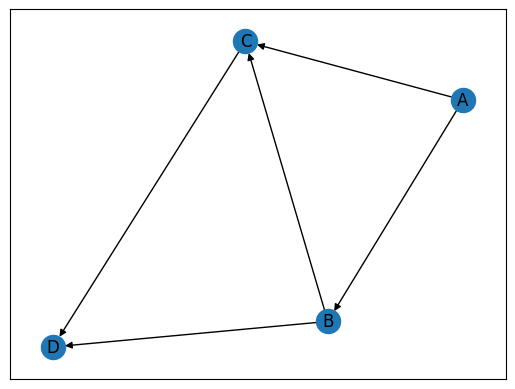

In [ ]:
import networkx as nx #libreria que permite crear grafos
G= nx.DiGraph() #grafica dirigida
G.add_edge("A","B",capacity=1)
G.add_edge("B","D",capacity=1)
G.add_edge("A","C",capacity=1)
G.add_edge("B","C",capacity=1)
G.add_edge("C","D",capacity=1) #graficar los nodos con flujo
nx.draw_networkx(G)

In [ ]:
G #tipo de dato

In [ ]:
nx.number_of_nodes(G) #numero de nodos

4

In [ ]:
nx.number_of_edges(G) #numero de aristas

5

In [ ]:
list(G.nodes) #nodos en forma de lista

['A', 'B', 'D', 'C']

In [ ]:
list(G.edges) #direccion del flujo

[('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'C'), ('C', 'D')]

In [ ]:
G.remove_node("A" )
G.remove_nodes_from("spam")
list(G.nodes) #eliminar un nodo

['B', 'D', 'C']

In [ ]:
list(G.neighbors("B" )) #vecinos de algún nodo

['D', 'C']

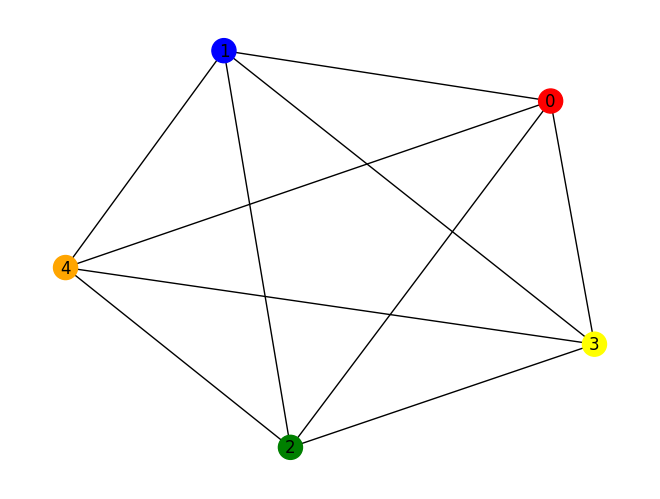

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.complete_graph(5)

# Lista de colores para cada nodo
node_colors = ['red', 'blue', 'green', 'yellow', 'orange']

# Dibujar el grafo con colores específicos para cada nodo
nx.draw(G, node_color=node_colors, with_labels=True)
plt.show()


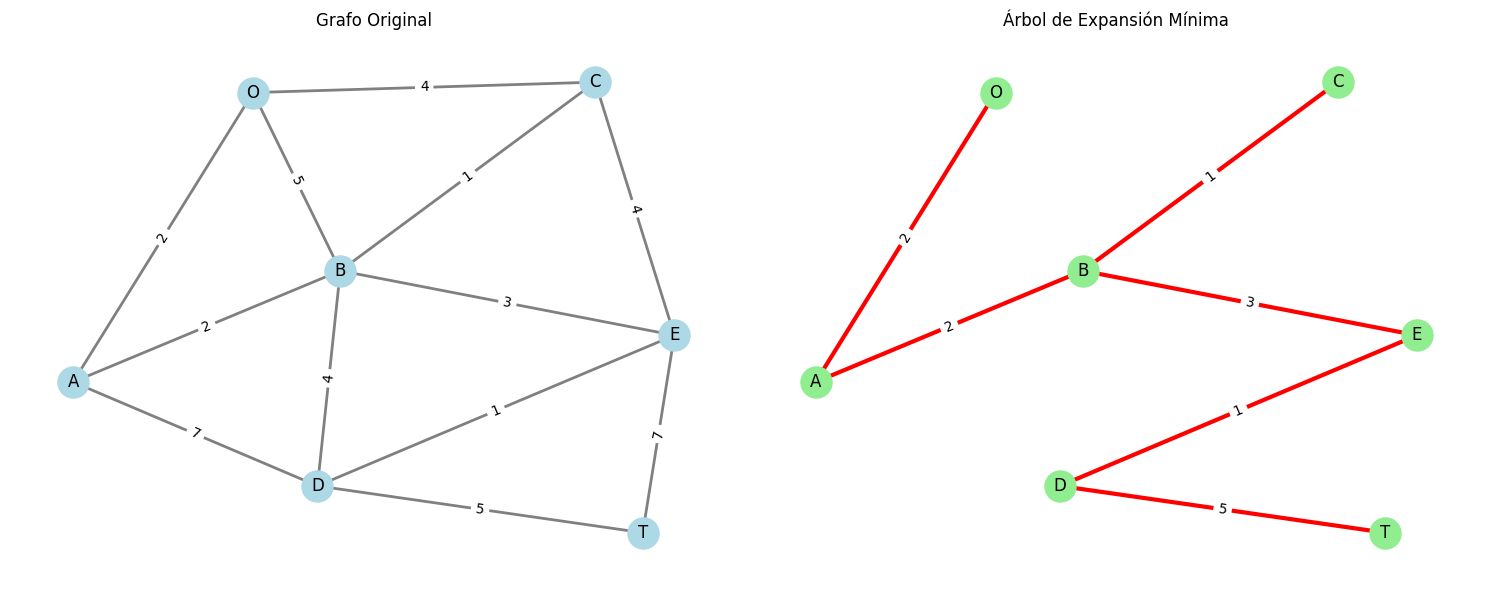

Distancia total del Árbol de expansión mínima: 14


In [1]:
# Árbol de expansión mínima
import networkx as nx
import matplotlib.pyplot as plt

def arbol_minimo(grafo, arbol_min):
    """Graficar el grafo original y su Árbol de expansión mínima"""

    # Posiciones para los nodos (iguales en ambos gráficos)
    pos = nx.spring_layout(grafo)

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Grafo PROBLEMA (dibujamos el grafo problema)
    nx.draw_networkx_nodes(grafo, pos, ax=ax1, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(grafo, pos, ax=ax1, edge_color='gray', width=2)
    nx.draw_networkx_labels(grafo, pos, ax=ax1, font_size=12)

    # Flujo de arcos
    edge_labels = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_edge_labels(grafo, pos, ax=ax1, edge_labels=edge_labels)

    ax1.set_title('Grafo Original')
    ax1.axis('off')

    # Árbol de expansión mínima
    nx.draw_networkx_nodes(arbol_min, pos, ax=ax2, node_size=500, node_color='lightgreen')
    nx.draw_networkx_edges(arbol_min, pos, ax=ax2, edge_color='red', width=3)
    nx.draw_networkx_labels(arbol_min, pos, ax=ax2, font_size=12)

    # Flujo de arcos en el Árbol de expansión mínima
    arco_min = nx.get_edge_attributes(arbol_min, 'weight')
    nx.draw_networkx_edge_labels(arbol_min, pos, ax=ax2, edge_labels=arco_min)

    ax2.set_title('Árbol de Expansión Mínima')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# GRafo
G = nx.Graph()
G.add_weighted_edges_from([
    ('O', 'A', 2), ('O', 'C', 4), ('O', 'B', 5), ('A', 'B', 2),
    ('C', 'B', 1), ('A', 'D', 7), ('C', 'E', 4), ('B', 'E', 3),
    ('B', 'D', 4), ('E', 'D', 1), ('D', 'T', 5), ('E', 'T', 7),

])

arbol_min = nx.minimum_spanning_tree(G)
arbol_minimo(G, arbol_min)

print(f"Distancia total del Árbol de expansión mínima: {sum(d['weight'] for u,v,d in arbol_min.edges(data=True))}")

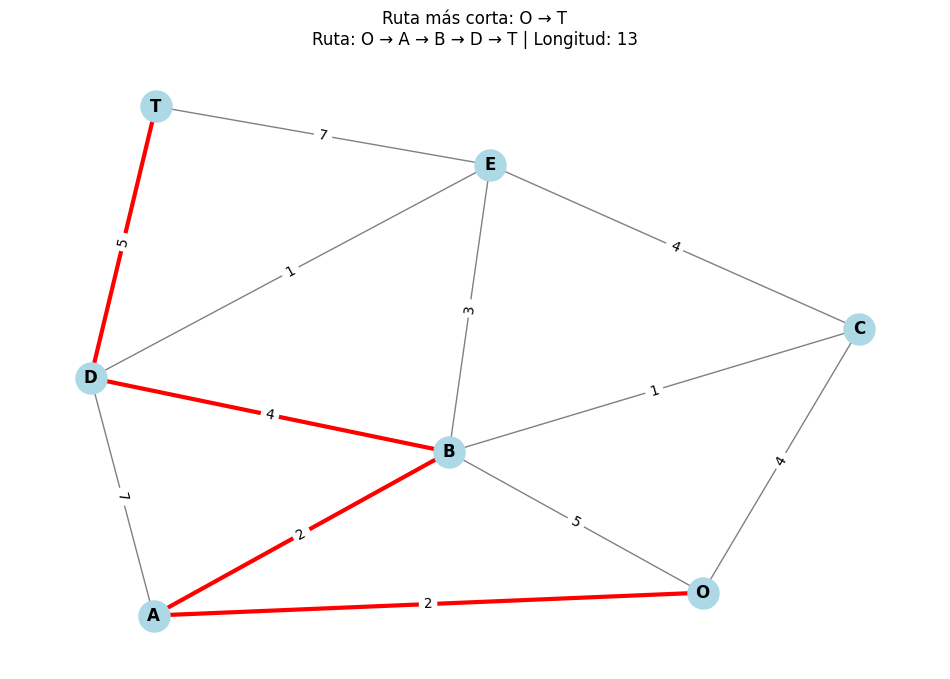

In [2]:
# Ruta más corta
def ruta_mas_corta(grafo, origen, destino):
    """Visualizar grafo y resaltar la ruta más corta"""

    # Calcular ruta más corta (shortest_path()), longitud de la ruta: (shortest_path_length())
    ruta = nx.shortest_path(grafo, source=origen, target=destino, weight='weight')
    longitud = nx.shortest_path_length(grafo, source=origen, target=destino, weight='weight')

    # Crear lista de arcos de la ruta
    aristas_ruta = [(ruta[i], ruta[i+1]) for i in range(len(ruta)-1)]

    # Posiciones para visualización
    pos = nx.spring_layout(grafo)

    # Dibujar el grafo
    plt.figure(figsize=(12, 8))

    # Nodos
    nx.draw_networkx_nodes(grafo, pos, node_size=500, node_color='lightblue')

    # Arcos normales (gris)
    aristas_normales = [arista for arista in grafo.edges() if arista not in aristas_ruta]
    nx.draw_networkx_edges(grafo, pos, edgelist=aristas_normales, edge_color='gray', width=1)

    # Arcos de la ruta más corta (rojo)
    nx.draw_networkx_edges(grafo, pos, edgelist=aristas_ruta, edge_color='red', width=3)

    # Arcos
    nx.draw_networkx_labels(grafo, pos, font_size=12, font_weight='bold')

    # Flujos de las aristas
    edge_labels = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels)

    plt.title(f'Ruta más corta: {origen} → {destino}\nRuta: {" → ".join(ruta)} | Longitud: {longitud}')
    plt.axis('off')
    plt.show()

    return ruta, longitud

# Grafo
G = nx.Graph()
G.add_weighted_edges_from([
    ('O', 'A', 2), ('O', 'C', 4), ('O', 'B', 5), ('A', 'B', 2),
    ('C', 'B', 1), ('A', 'D', 7), ('C', 'E', 4), ('B', 'E', 3),
    ('B', 'D', 4), ('E', 'D', 1), ('D', 'T', 5), ('E', 'T', 7),

])

ruta, longitud = ruta_mas_corta(G, 'O', 'T')

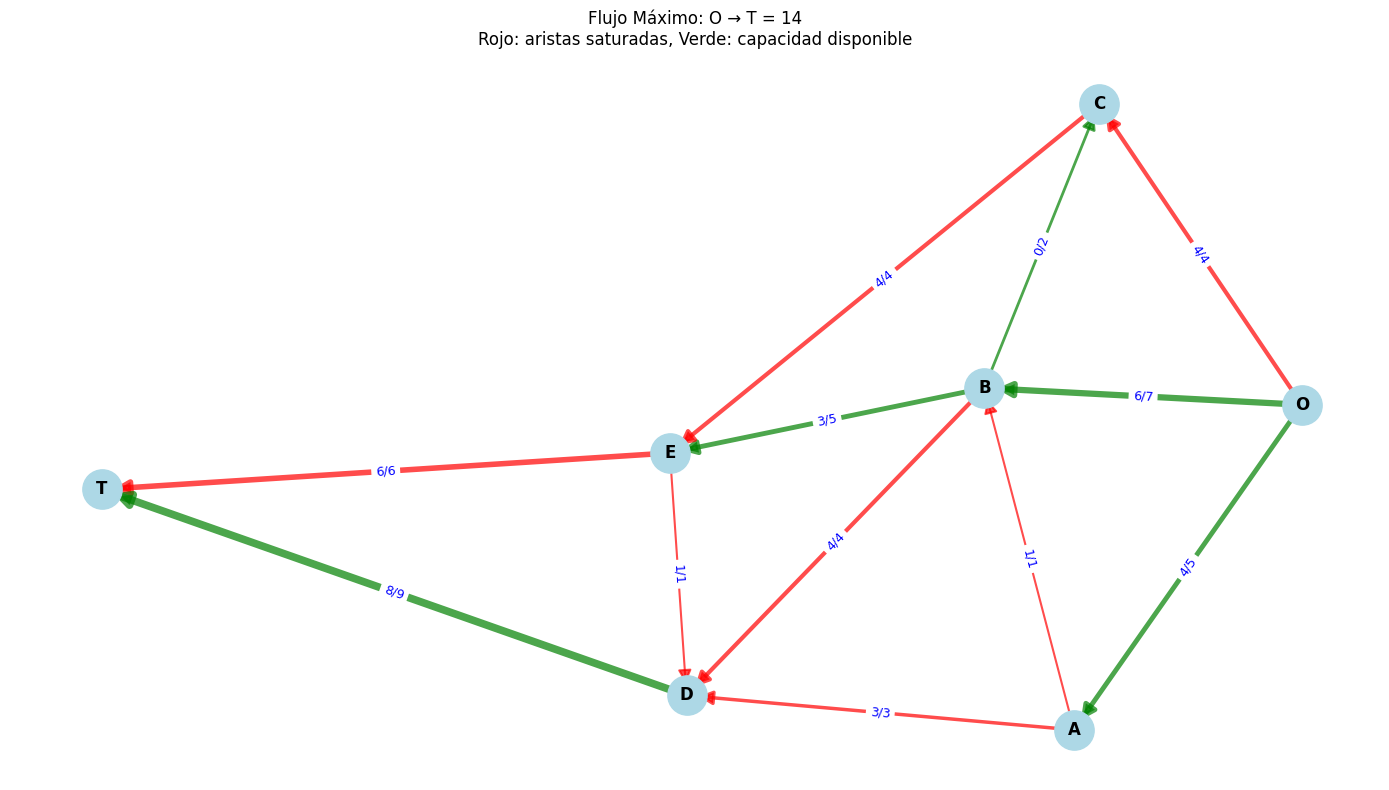

In [3]:
# Flujo máximo
def visualizar_flujo_maximo(grafo, origen, destino):
    """Visualiza el grafo de flujo con capacidades y flujos"""

    # Calcular flujo máximo
    valor_flujo, flujo_dict = nx.maximum_flow(grafo, origen, destino)

    # Posiciones para visualización
    pos = nx.spring_layout(grafo)

    # Crear figura
    plt.figure(figsize=(14, 8))

    # Dibujar nodos
    nx.draw_networkx_nodes(grafo, pos, node_size=800, node_color='lightblue')

    # Dibujar aristas con grosor proporcional a la capacidad
    for u, v, data in grafo.edges(data=True):
        capacidad = data['capacity']
        flujo_actual = flujo_dict[u][v]

        # Grosor proporcional a la capacidad
        width = capacidad / 2 + 1

        # Definimos los colores rojo si está saturada, verde si aún tiene capacidad
        color = 'red' if flujo_actual == capacidad else 'green'

        nx.draw_networkx_edges(grafo, pos, edgelist=[(u, v)],
                              width=width, edge_color=color, alpha=0.7,
                              arrows=True, arrowsize=20)

    # Etiquetas de nodos
    nx.draw_networkx_labels(grafo, pos, font_size=12, font_weight='bold')

    # Etiquetas de aristas (capacidad/flujo)
    edge_labels = {}
    for u, v, data in grafo.edges(data=True):
        capacidad = data['capacity']
        flujo_actual = flujo_dict[u][v]
        edge_labels[(u, v)] = f"{flujo_actual}/{capacidad}"

    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels,
                                font_size=9, font_color='blue')

    plt.title(f'Flujo Máximo: {origen} → {destino} = {valor_flujo}\n'
              f'Rojo: aristas saturadas, Verde: capacidad disponible')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return valor_flujo, flujo_dict


G_visual = nx.DiGraph()
G_visual.add_edge('O', 'A', capacity=5)
G_visual.add_edge('O', 'B', capacity=7)
G_visual.add_edge('O', 'C', capacity=4)
G_visual.add_edge('A', 'B', capacity=1)
G_visual.add_edge('B', 'C', capacity=2)
G_visual.add_edge('C', 'E', capacity=4)
G_visual.add_edge('A', 'D', capacity=3)
G_visual.add_edge('B', 'D', capacity=4)
G_visual.add_edge('B', 'E', capacity=5)
G_visual.add_edge('E', 'D', capacity=1)
G_visual.add_edge('D', 'T', capacity=9)
G_visual.add_edge('E', 'T', capacity=6)

valor_flujo, flujo_dict = visualizar_flujo_maximo(G_visual, 'O', 'T')